In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import random


# Problem Statment 

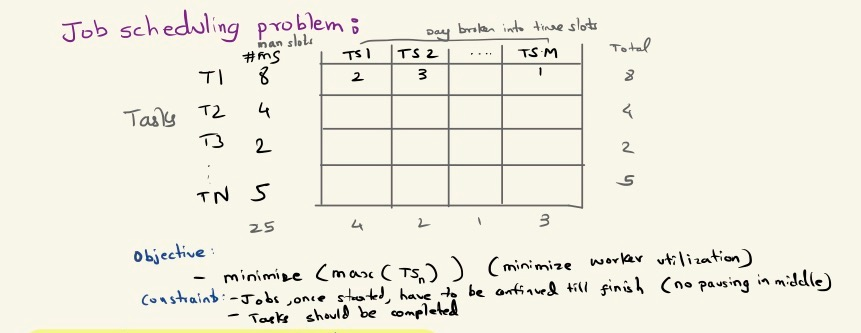

# Declaring Hyperparameters

In [2]:

slots= 20 
organisms=4000 # No of solutions in each generations
generation=40
Tasks=50


In [3]:
# Creating Tasks list 
Task=[]
for i in range(Tasks):
    Task.append("Task "+str(i))

In [4]:
# Assigning Manhours Randomly 
Manhour=[]
for i in range(Tasks):
    Manhour.append(random.randint(10,100))

In [5]:
df = pd.DataFrame(
    {'Task': Task,
     'Manhour': Manhour,}
     )

In [7]:
df.head()

,Task,Manhour
0,Task 0,36
1,Task 1,96
2,Task 2,33
3,Task 3,34
4,Task 4,85


In [9]:
#Creating blank columns for man assigned in a particular time slot for a particular task 
for i in range(1,slots+1,1):
    df[i]=0.0
    df[i].astype(float)

In [11]:
df.head(10)

,Task,Manhour,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,Task 0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Task 1,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Task 2,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Task 3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Task 4,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Task 5,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Task 6,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Task 7,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Task 8,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Task 9,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
tasks=df['Task'].to_list()

In [35]:
df['start']=0.0

#  Initating the first generation

In [36]:

genes_all={}# master dataframe having all solutions

for k in range(0,organisms,1): 
    genes=df.copy()
    for i in range(len(tasks)):
        #Randomly selecting which slot the task will start from 
        start=random.choices([*range(1,slots+1,1)])[0] 
        genes['start'][i]=start
        # Randomly selected the proportion of work to be done in the starting slot 
        genes[start][i]=random.randrange(1,10,1)/10
 
    for j in range(2,slots+1,1):
        # if the previous slot is non zero, the cureent slot cannot be zero
        genes[j]=np.where((genes[j-1]>0)&(genes[j]==0),random.randrange(1,10,1)/10,genes[j])
    for j in range(3,slots+1,1):
        # if the work has been contiuing for the past two slots, has to be finished in the third slot 
        genes[j]=np.where((genes[j-2]>0)&(genes[j-1]>0),1,genes[j])
    
    #if the work is unfinished till the last slot, has to be finished in the last slot 
    genes[slots]=np.where(genes[[*range(1,slots+1,1)]].max(axis=1)<1,1,genes[slots])
    
    genes_all[k]= pd.DataFrame(genes,columns=genes.columns)
    if k%200==0:
        print(k)


<ipython-input-36-bd30e7ae63e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes['start'][i]=start
<ipython-input-36-bd30e7ae63e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes[start][i]=random.randrange(1,10,1)/10


0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [38]:
len(genes_all.keys())

4000

# Getting the final outcome (no of labour to assigned at each slot) for the first generation


In [41]:
outcome_all={}
for j in range(0,organisms,1):
    outcome=df.copy()
    
    outcome['Assigned']=outcome[[*range(1,slots+1,1)]].sum(axis=1)
    for i in range(1,slots+1,1):
        #Total remaning manhour to be assigned multiplied by the value attained above
        outcome[i]=(outcome["Manhour"]-outcome['Assigned'])*genes_all[j][i]
        #rounding off the values
        outcome[i]=outcome[i].apply(np.ceil)
        outcome['Assigned']=outcome[[*range(1,slots+1,1)]].sum(axis=1)
    Total=outcome.sum()
    Total.name='Total'
    outcome = outcome.append(Total.transpose())
    outcome_all[j] = pd.DataFrame(outcome,columns=outcome.columns)

# Defining the fitness function 


In [42]:
#fitness function is the minimum of maximum labour required at any slot 

fitness=[]
Dataframe=[]
for i in range (0,organisms,1):
    fitness.append(outcome_all[i].loc['Total',[*range(1,slots+1,1)]].max())
    Dataframe.append(i)

In [43]:
fit_values = pd.DataFrame(
    {'Dataframe': Dataframe,
     'fitness': fitness,}
     )


In [44]:
# int((len(df_3_all.keys())+1)/4)

In [45]:

selected=fit_values.sort_values(by='fitness').reset_index(drop=True)

In [46]:
# extra mahour required sompared to theoratical perfection
selected['extra']=selected['fitness']-(df['Manhour'].sum()/slots)

In [47]:
# Assigning fitness values
selected['prob']=(1/selected['extra']**2)

In [48]:
# fitness values of all the solutions
selected

,Dataframe,fitness,extra,prob
0,1495,188.0,54.35,0.000339
1,2452,189.0,55.35,0.000326
2,2852,190.0,56.35,0.000315
3,2925,192.0,58.35,0.000294
4,1702,196.0,62.35,0.000257
...,...,...,...,...
3995,3892,630.0,496.35,0.000004
3996,100,634.0,500.35,0.000004
3997,198,644.0,510.35,0.000004
3998,2152,715.0,581.35,0.000003


In [356]:
dataframe=selected['Dataframe'].to_list()

In [357]:
weight=selected['prob'].to_list()

In [358]:
selected.shape[0]

100

In [359]:
slots

20

In [360]:
d1=random.choices(dataframe,weights=weight)[0]
d2=random.choices(dataframe,weights=weight)[0]

In [361]:
d1,d2

(35, 86)

In [362]:
# genes=df.copy()
# df_sel=random.choices([genes_all[d1],genes_all[d2]])[0]
# df_sel                       
# genes.loc[0,:]=df_sel.loc[0,:]

In [363]:
# row,column

In [364]:
# df_sel.loc[row,column]=random.randrange(1,10,1)/10

In [365]:
# df_sel

# Iterating thorugh multiple generations

In [366]:
df_outcome={} # solution for each organism in each generation
df_genes={}
df_selected={}
for generations in range(1,generation+1,1):
    print(generations)
    for k in range(0,organisms,1):
        
            genes=df.copy()

        # Creating new generations by mixing solutions of previous generations     
            d1=random.choices(dataframe,weights=weight)[0]
            d2=random.choices(dataframe,weights=weight)[0]
            for i in range(len(tasks)):
                df_sel=random.choices([genes_all[d1],genes_all[d2]])[0]
                genes.loc[i,:]=df_sel.loc[i,:] 
            #mutation 1 
            row=random.choices([*range(len(tasks))])[0]
            column=random.choices([df_sel['start'][row],df_sel['start'][row]+1])[0]
            genes.loc[row,column]=random.randrange(1,10,1)/10
            #mutation 2
            row=random.choices([*range(len(tasks))])[0]
            column=random.choices([df_sel['start'][row],df_sel['start'][row]+1])[0]
            genes.loc[row,column]=random.randrange(1,10,1)/10
            #mutation 3
            row=random.choices([*range(len(tasks))])[0]
            column=random.choices([df_sel['start'][row],df_sel['start'][row]+1])[0]
            genes.loc[row,column]=random.randrange(1,10,1)/10
            
            genes=genes.mask(genes.isnull(), np.random.random(size=genes.shape)) 
            for j in range(2,slots+1,1):
                genes[j]=np.where((genes[j-1]>0)&(genes[j]==0),random.randrange(1,10,1)/10,genes[j])
            for j in range(3,slots+1,1):
                genes[j]=np.where((genes[j-2]>0)&(genes[j-1]>0),1,genes[j])
            genes[slots]=np.where(genes[[*range(1,slots+1,1)]].max(axis=1)<1,1,genes[slots])
            genes_all[k] = pd.DataFrame(genes,columns=genes.columns)

    outcome_all={}
    for j in range(0,organisms,1):
            outcome=df.copy()
            outcome['Assigned']=outcome[[*range(1,slots+1,1)]].sum(axis=1)
            for i in range(1,slots+1,1):
                outcome[i]=(outcome["Manhour"]-outcome['Assigned'])*genes_all[j][i]
                outcome[i]=outcome[i].apply(np.ceil)
                outcome['Assigned']=outcome[[*range(1,slots+1,1)]].sum(axis=1)
            Total=outcome.sum()
            Total.name='Total'
            outcome = outcome.append(Total.transpose())
            outcome_all[j] = pd.DataFrame(outcome,columns=outcome.columns)
    fitness=[]
    Dataframe=[]
    for i in range (0,organisms,1):
        fitness.append(outcome_all[i].loc['Total',[*range(1,slots+1,1)]].max())
        Dataframe.append(i)
    fit_values = pd.DataFrame(
            {'Dataframe': Dataframe,
             'fitness': fitness,}
             )

    selected=fit_values.sort_values(by='fitness').reset_index(drop=True)
    selected['extra']=selected['fitness']-(df['Manhour'].sum()/slots)
    selected['prob']=(1/selected['extra']**5)
    dataframe=selected['Dataframe'].to_list()
    weight=selected['prob'].to_list()
    df_genes[generations] = genes_all
    df_outcome[generations] = outcome_all
    df_selected[generations] = pd.DataFrame(selected,columns=selected.columns)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [375]:
#fitness values of the last generation
df_selected[40]

,Dataframe,fitness,extra,prob
0,43,148.0,19.65,3.413400e-07
1,47,149.0,20.65,2.663175e-07
2,81,149.0,20.65,2.663175e-07
3,74,149.0,20.65,2.663175e-07
4,42,150.0,21.65,2.102377e-07
...,...,...,...,...
95,67,189.0,60.65,1.218557e-09
96,5,189.0,60.65,1.218557e-09
97,83,192.0,63.65,9.572116e-10
98,49,193.0,64.65,8.854364e-10
